# Installations


In [1]:
# Clone the SAM2 repository
!git clone https://github.com/SysCV/sam-hq.git

# Navigate to the repository directory
%cd sam-hq

# Install the necessary dependencies
!pip install -e .

Cloning into 'sam-hq'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 461 (delta 183), reused 138 (delta 132), pack-reused 191 (from 1)
Receiving objects: 100% (461/461), 42.17 MiB | 17.72 MiB/s, done.
Resolving deltas: 100% (214/214), done.
/content/sam-hq
Obtaining file:///content/sam-hq
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment_anything


In [2]:
!pip install timm==0.4.12 --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 9.2 MB/s eta 0:00:00


In [3]:
!pip install torch==2.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [4]:
!git clone https://gitlab.com/fruitpunch/projects/ai-for-coral-reefs-2/unsupervised-learning/packages.git

Cloning into 'packages'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 85 (delta 11), reused 0 (delta 0), pack-reused 43 (from 1)
Receiving objects: 100% (85/85), 87.62 KiB | 7.97 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [5]:
!pip install torchmetrics --no-deps
!pip install lightning_utilities --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 12.2 MB/s eta 0:00:00


In [6]:
# workaround to overcome long duration needed for installing torch_scatter
import torch
!pip install pyg_lib torch_scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html

Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 58.5 MB/s eta 0:00:00


# Import

In [7]:
import os
import pandas as pd
from google.colab import drive
import numpy as np
import yaml
import shutil
import torch
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from pathlib import Path

import logging
logger = logging.getLogger(__name__)
# Set the logging level (optional)
logger.setLevel(logging.DEBUG)

DRIVE_MOUNT_DIR = '/content/drive'
drive.mount(DRIVE_MOUNT_DIR, force_remount=True)

Mounted at /content/drive


In [8]:
import sys # add the path where point label aware superpixels and custom packags is located
sys.path.append(os.path.join('/content/sam-hq', 'packages'))

from labelmate.loader import LabelPropDataLoader
from labelmate.patchifier import SimplePatchifier
from labelmate.visualizer import visualize_output
from labelmate.evaluator import LabelPropEvaluator
from labelmate.propagator import PLASPIXLabelProp, SAMPointPromptsLabelProp

In [9]:
folder='SEAVIEW_ATL'
region='ATL'
PROJECT_ROOT_DIR = os.path.join(DRIVE_MOUNT_DIR, 'My Drive', 'challenge_2')
REEF_SUPPORT_SEAVIEW_POINT_LABELS_PATH = os.path.join(PROJECT_ROOT_DIR, '01_Data', 'benthic_datasets', 'point_labels', 'SEAVIEW' , 'tabular-data', f'annotations_{region}.csv')

point_labels_df = pd.read_csv(REEF_SUPPORT_SEAVIEW_POINT_LABELS_PATH, header='infer')
point_labels_df['class_label'] = np.where(
    point_labels_df['func_group'] == 'Hard Coral', 1,  # First condition
    np.where(point_labels_df['func_group'] == 'Soft Coral', 2, 0)  # Second condition
)
point_labels_df['quadratid']=point_labels_df['quadratid'].astype(str)
# point_labels_df=point_labels_df[point_labels_df['quadratid']==quadratid]
point_labels_df

,quadratid,y,x,label_name,label,func_group,method,data_set,class_label
0,17001738002,180,183,Fish,FISH,Other,random,test,0
1,17001738002,199,162,CCA,CCA,Algae,random,test,0
2,17001738002,197,160,CCA,CCA,Algae,random,test,0
3,17001738002,88,561,Turf,Turf,Algae,random,test,0
4,17001738002,195,714,Ocomplex,OCOM,Hard Coral,random,test,1
...,...,...,...,...,...,...,...,...,...
92895,21011130002,619,738,Pseudodiploria bleached,PSEU-BL,Hard Coral,target,train,1
92896,21011130002,535,751,Pseudodiploria bleached,PSEU-BL,Hard Coral,target,train,1
92897,21011130002,458,555,Pseudodiploria bleached,PSEU-BL,Hard Coral,target,train,1
92898,21011130002,409,539,Pseudodiploria bleached,PSEU-BL,Hard Coral,target,train,1


In [10]:
if os.path.exists('/content/datasets'):
  shutil.rmtree('/content/datasets')
os.mkdir('/content/datasets')
os.mkdir('/content/datasets/images')
os.mkdir('/content/datasets/masks')
os.mkdir('/content/datasets/predicted_masks')

if not os.path.exists('/content/weights'):
  os.mkdir('/content/weights')

if not os.path.exists('/content/weights/sam-hq'):
  os.mkdir('/content/weights/sam-hq')

In [11]:
%cd /content/sam-hq

/content/sam-hq


In [12]:
from segment_anything import SamPredictor, sam_model_registry


# Load and prepare your image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image_resized = cv2.resize(image, (256, 256))  # Resize to 1024x1024
    return image

# sam_hq = sam_model_registry["vit_h"](checkpoint="/content/weights/sam-hq/sam_hq_vit_h.pth")
# sam_hq = sam_model_registry["vit_tiny"](checkpoint="/content/weights/sam-hq/sam_hq_vit_tiny.pth")
sam_hq = sam_model_registry["vit_b"](checkpoint="/content/weights/sam-hq/sam_hq_vit_b.pth")

# Initialize the predictor
predictor = SamPredictor(sam_hq)

/content/sam-hq/segment_anything/build_sam.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f, map_location=device)


<All keys matched successfully>


Quadrat Id in progress:  25016137702
/content/drive/My Drive/challenge_2/01_Data/benthic_datasets/mask_labels/reef_support/SEAVIEW_ATL/images/25016137702.jpg


DEBUG:__main__:Positive Class Label: 0
DEBUG:__main__:Number of Point Coordinates: 50
DEBUG:__main__:Points Coordinates (x,y): [[365, 169], [311, 147], [509, 83], [522, 150], [382, 171], [467, 169], [688, 101], [569, 149], [625, 128], [818, 177], [133, 325], [194, 371], [518, 275], [667, 241], [616, 213], [793, 349], [851, 301], [208, 372], [379, 534], [560, 463], [661, 464], [835, 380], [129, 579], [223, 613], [358, 691], [368, 543], [312, 580], [247, 690], [280, 690], [225, 619], [444, 644], [504, 598], [400, 652], [636, 580], [636, 557], [687, 592], [579, 677], [793, 654], [856, 639], [718, 543], [204, 804], [63, 859], [508, 704], [441, 793], [511, 800], [465, 722], [687, 780], [845, 814], [720, 718], [833, 747]]
DEBUG:__main__:Point Labels: [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
DEBUG:__main__:Positive Class Label: 1
DEBUG:__main__:Number of Point Coordinates: 50
DEBUG:__

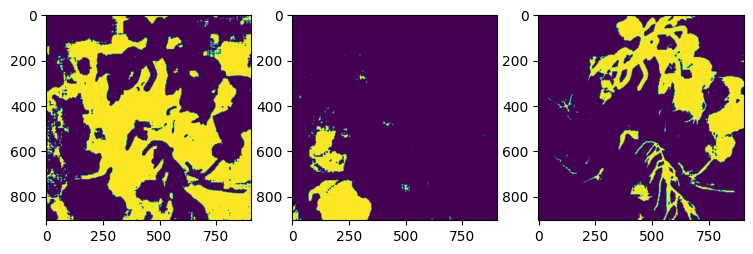

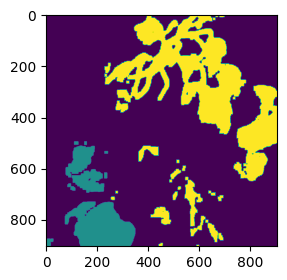

Predicted mask saved at: /content/datasets/predicted_masks/25016137702.png


In [17]:
from PIL import Image
predicted_mask_folder='/content/datasets/predicted_masks'
#preprocess_technique='RayleighDistribution'

val_qudratid=['25016137702']
for qd in val_qudratid:
  print("Quadrat Id in progress: ",qd)

  point_labels_df_qd=point_labels_df[point_labels_df['quadratid']==qd]

  if point_labels_df_qd is None:
    continue
  image_path = os.path.join(PROJECT_ROOT_DIR, "01_Data", "benthic_datasets", "mask_labels", "reef_support", f"SEAVIEW_{region}", "images", f"{qd}.jpg") #   print(image_path)
  if not os.path.exists(image_path):
    print('->Image not found<-')
    continue
  print(image_path)
  image = load_image(image_path)
  predictor.set_image(image)

  prompts = []

  for positive_class_label in [0, 1, 2]:
    # if positive_class_label!=0:
      point_coords = []
      point_labels = []

      # build points based prompting parameters using positive and negative labels
      for index, point_label in point_labels_df_qd.iterrows():
          point_coords.append([point_label['x'], point_label['y']])
          if point_label.class_label == positive_class_label:
              point_labels.append(1)
          else:
              point_labels.append(0)

      logger.debug(f"Positive Class Label: {positive_class_label}")
      logger.debug(f"Number of Point Coordinates: {len(point_coords)}")
      logger.debug(f"Points Coordinates (x,y): {point_coords}")
      logger.debug(f"Point Labels: {point_labels}")

      # add positive class label and points details as a prompt
      prompt = dict(class_label=positive_class_label, point_coords=point_coords, point_labels=point_labels)
      prompts.append(prompt)

  for index in range(len(prompts)):
    sam_masks = sam_scores = sam_logits = None

    sam_masks, sam_scores, sam_logits = \
        predictor.predict(
            point_coords=np.array(prompts[index]['point_coords']),
            point_labels=np.array(prompts[index]['point_labels']),
            multimask_output=False,
            )

    prompts[index]['mask'] = sam_masks[0]
    prompts[index]['score'] = sam_scores[0]
    prompts[index]['logits'] = sam_logits[0]
    prompts[index]['logits_min'] = np.min(sam_logits[0])

  sam_logits_stacked = np.array([prompt['logits'] for prompt in prompts])
  sam_logits_stacked.shape

  sam_logits_max = np.argmax(sam_logits_stacked, axis=0)
  sam_logits_max.shape

  for index in range(len(prompts)):
    logits_blended = prompts[index]['logits'][:,:]
    pull_down_indices = np.where(sam_logits_max != index, True, False)
    logits_blended[pull_down_indices] = prompts[index]['logits_min']
    prompts[index]['logits_blended'] = logits_blended[:,:]

  for index in range(len(prompts)):
    post_processed_mask = \
        sam_hq.postprocess_masks(
            masks=torch.from_numpy(prompts[index]['logits_blended']).unsqueeze(dim=0).unsqueeze(dim=0),
            input_size=predictor.input_size,
            original_size=predictor.original_size,
            )

    prompts[index]['mask_blended'] = post_processed_mask.squeeze().numpy() > predictor.model.mask_threshold

  sam_masks_stacked = np.array([prompt['mask_blended'] * prompt['class_label'] for prompt in prompts])
  mask_blended = np.sum(sam_masks_stacked, axis=0)

  # Apply the opening operation (erosion followed by dilation)
  kernel = np.ones((10, 10), np.uint8)
  mask_blended = cv2.morphologyEx(mask_blended.astype(np.uint8), cv2.MORPH_OPEN, kernel)

  fig, ax = plt.subplots(nrows=1, ncols=len(prompts), figsize=(9, 3))
  for index in range(len(prompts)):
      ax[index].imshow(prompts[index]['mask_blended'])
  plt.show()

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
  ax.imshow(mask_blended)
  plt.show()

  # Assuming full_label is a NumPy array, convert it to a PIL Image and save it
  predicted_mask_path = os.path.join(predicted_mask_folder,f'{qd}.png')

  # Convert the NumPy array to a PIL image
  predicted_mask_image = Image.fromarray(mask_blended.astype(np.uint8))

  # Save the image to the specified path
  predicted_mask_image.save(predicted_mask_path)

  print(f"Predicted mask saved at: {predicted_mask_path}")